# 🧠 Exploratory Data Analysis (EDA)

Hello! This notebook contains the complete process of obtaining the data and building a machine learning model.

In this first section, we will load the dataset, perform Exploratory Data Analysis (EDA), and handle missing values.


## 📚 Libraries

Let's start by importing the libraries required for data manipulation, visualization, and modeling.

In [2]:
import pandas as pd 
import numpy as np
import os
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)
import re

## 📥 Getting the Data

In this step, we load the dataset that will be used throughout the project. The data contains information about residential properties in Bengaluru, including location, size, number of bedrooms, and more.

In [3]:
df = pd.read_csv("../data/Bengaluru_House_Data.csv")

## 👀 Initial Data Overview

Let's take a first look at the dataset to understand its structure, column names, and types of values.

We'll check:
- The first few rows of the data
- The number of rows and columns
- The data types of each feature

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,383.193002
std,1.341458,0.817263,4217.107589
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,177115.000000


In [6]:
df.shape

(13320, 9)

In [7]:
# total_sqft is missing from the .describe() summary, indicating the presence of non-numeric entries in the column.
df['total_sqft'].value_counts()

total_sqft
1200           843
1100           221
1500           205
2400           196
600            180
              ... 
2920             1
5665.84          1
1369             1
7150             1
1200 - 1470      1
Name: count, Length: 2117, dtype: int64

In [8]:
# Entries such as '1200 - 1470' suggest that the total_sqft column contains non-numeric values, and there may be additional instances like this.

In [9]:
df['area_type'].value_counts(ascending=False)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [10]:
df['availability'].value_counts(ascending=False)

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
df['location'].value_counts(ascending=False)

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [13]:
df['size'].value_counts(ascending=False)

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [14]:
df['society'].value_counts(ascending=False)

society
GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
SNadeAr     1
DSellil     1
Shensit     1
VKvenas     1
Vemes H     1
Name: count, Length: 2688, dtype: int64

In [15]:
df['bath'].value_counts(ascending=False)

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
27.0       1
14.0       1
40.0       1
15.0       1
18.0       1
Name: count, dtype: int64

In [16]:
df['balcony'].value_counts(ascending=False)

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

## 🧹 Removing Unnecessary Columns

In this section, we will remove columns that are not relevant or useful for our application.

In [17]:
df = df.drop(['area_type','society'], axis='columns')
df.head(10)

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Ready To Move,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,18-May,Old Airport Road,4 BHK,2732,4.0,NaN,204.00
7,Ready To Move,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00
8,Ready To Move,Marathahalli,3 BHK,1310,3.0,1.0,63.25
9,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00


## 🛠️ Dealing with Null Values

Handling null values is a common task in data preprocessing, and there are several approaches to deal with them:

1. Removing rows with null values
2. Removing the entire column
3. Filling null values with the **mean** or **median** (for numerical data)
4. Filling null values with the most frequent value (for categorical data)

In this dataset, there are 4 columns with null values. To handle these, we will make decisions based on the number of null values and the nature of each column:

- **Location**: Only one null value exists. Since this is categorical data, we will use **approach 4**, filling the null with the most frequent value ("Whitefield").
- **Size**: This is a string type column with 16 missing values. We will use **approach 1**, removing rows with missing data.
- **Bath**: Analyzing the data with `value_counts()`, we observe many outliers. Since the mean is affected by these outliers, we will use **approach 3** and fill the missing values with the **median**.
- **Balcony**: This column has many null values. Although we could use **approach 2** (removing the column), we will use **approach 3** and fill the missing values with the **mean** for now.

In [18]:
# Location
df['location'] = df['location'].fillna('Whitefield')

# Bath
bath_median = df['bath'].median()
df['bath'] = df['bath'].fillna(bath_median)

# Balcony
balcony_mean = df['balcony'].mean()
df['balcony'] = df['balcony'].fillna(balcony_mean)

# Size and Others
clean_df = df.dropna()

In [19]:
clean_df.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [20]:
clean_df.shape

(13304, 7)

# 🛠️ Feature Engineering

In this section, we will perform some feature engineering to create new features that will be useful for the next steps and the machine learning model. Although outlier treatment is typically part of the exploratory data analysis (EDA) process, for this dataset, it is necessary to handle some feature engineering and data transformations before dealing with outliers.

The objectives here are:

1. Transform the data in the **'availability'** column into a new binary column that includes only the "Ready to Move" status, and then remove the original column.
2. Split the numerical data in the **'size'** column into a new column named **'bhk'** (representing the number of bedrooms).
3. Apply a transformation to the **'total_sqft'** column by converting string data (e.g., "1200 - 1470") into numerical values by calculating the mean of the two numbers.
4. Handle dimension reduction for the **'location'** column by grouping locations with fewer than 10 data points into a single category.
5. Create a new column representing the price per square foot for outlier detection.


In [21]:
# 1. Availability into Ready to Move
feature_df = clean_df.copy()
feature_df.loc[:, 'ready_to_move'] = feature_df['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)
feature_df = feature_df.drop('availability', axis='columns')
feature_df['ready_to_move'].value_counts()

ready_to_move
1    10581
0     2723
Name: count, dtype: int64

In [22]:
# 2. Splitting Size into BHK
feature_df1 = feature_df.copy()
feature_df1.loc[:, 'bhk'] = feature_df1['size'].apply(lambda x: int(x.split(' ')[0]))
feature_df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [23]:
# 3. Transforming total_sqft

# This function will return if a value is float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

feature_df1['total_sqft'][~feature_df1['total_sqft'].apply(is_float)].unique()

array(['2100 - 2850', '3010 - 3410', '2957 - 3450', '3067 - 8156',
       '1042 - 1105', '1145 - 1340', '1015 - 1540', '1520 - 1740',
       '34.46Sq. Meter', '1195 - 1440', '4125Perch', '1120 - 1145',
       '4400 - 6640', '3090 - 5002', '4400 - 6800', '1160 - 1195',
       '1000Sq. Meter', '4000 - 5249', '1115 - 1130', '1100Sq. Yards',
       '520 - 645', '1000 - 1285', '3606 - 5091', '650 - 665',
       '633 - 666', '5.31Acres', '30Acres', '1445 - 1455', '884 - 1116',
       '850 - 1093', '1440 - 1884', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '660 - 670', '1500Sq. Meter', '620 - 933', '142.61Sq. Meter',
       '2695 - 2940', '1574Sq. Yards', '3450 - 3472', '1250 - 1305',
       '670 - 980', '1005.03 - 1252.49', '1004 - 1204', '361.33Sq. Yards',
       '645 - 936', '2710 - 3360', '2249.81 - 4112.19', '3436 - 3643',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '9

In [24]:
len(feature_df1['total_sqft'])

13304

In [25]:
# There are other types of string values in the total_sqft column that need to be addressed. 
# While reviewing the database in Excel, I found entries like 'Sq. Meter' and 'Sq. Yard.' However, there are more types of data, 
# and only the ones like the ranged values and those with 'Sq.' will be processed. The rest will be removed.

def convert_sqft_to_num(x):

    # Ranges
    if '-' in x:
        tokens = x.split('-')
        try:
            return (float(tokens[0]) + float(tokens[1])) / 2
        except:
            return None
        
    # Others
    else:
        x = x.strip()

        # Using regex to get the numbers and characters. Idetifing if it's meter or yard.
        match = re.match(r"([\d\.]+)\s*(Sq\.?\s*\w+)?", x, re.IGNORECASE)
        if match:
            num = float(match.group(1))
            unit = match.group(2)
            
            if unit:
                unit = unit.lower().replace(".", "").replace(" ", "")
                if "meter" in unit:
                    # Cosidering 1 sq.meter = 10.77 sqft
                    return num * 10.7639
                elif "yard" in unit:
                    # Cosidering 1 sq.yard = 9 sqft
                    return num * 9.0
                else:
                    return None
    
    try:
        return float(x)
    except:
        return None

In [26]:
# Testing

print(convert_sqft_to_num("34.46Sq.Meter"))     
print(convert_sqft_to_num("1000-1500"))        
print(convert_sqft_to_num("500"))
print(convert_sqft_to_num("500.1"))
print(convert_sqft_to_num("34 Other")) 

370.923994
1250.0
500.0
500.1
None


In [27]:
feature_df2 = feature_df1.copy()
feature_df2.total_sqft = feature_df2.total_sqft.apply(convert_sqft_to_num)
feature_df2 = feature_df2[feature_df2.total_sqft.notnull()]
feature_df2.describe()

,total_sqft,bath,balcony,price,ready_to_move,bhk
count,13290.000000,13290.00000,13290.000000,13290.000000,13290.000000,13290.000000
mean,1567.999255,2.68924,1.584947,363.559229,0.795260,2.803311
std,1305.541354,1.33755,0.798392,3907.284799,0.403527,1.292786
min,1.000000,1.00000,0.000000,8.000000,0.000000,1.000000
25%,1100.000000,2.00000,1.000000,50.000000,1.000000,2.000000
50%,1275.000000,2.00000,2.000000,72.000000,1.000000,3.000000
75%,1680.000000,3.00000,2.000000,120.000000,1.000000,3.000000
max,52272.000000,40.00000,3.000000,99745.000000,1.000000,43.000000


In [28]:
# Now, total_sqft appears in the .describe() output, as it is now a column with numerical data. It has lost only 14 data points (13304 - 13290).

In [29]:
# 4. Dealing with locations that have less than 10 data points

len(feature_df2['location'].unique())

1299

In [30]:
# Removing spaces from the beginning and end of the location strings
feature_df2.location = feature_df2.location.apply(lambda x: x.strip())
feature_df2.location = feature_df2.location.apply(lambda x: x.lower())

# Group by location and use the aggregate function to count the entries per location. 
# This procedure is done to handle locations with the same name but with leading/trailing spaces or differing letter cases.
location_stats = feature_df2['location'].value_counts(ascending=False)
location_stats

location
whitefield                              541
sarjapur  road                          397
electronic city                         304
kanakpura road                          271
thanisandra                             237
                                       ... 
jogupalya                                 1
subhash nagar                             1
kengeri satellite town khb apartment      1
hanuman nagar                             1
chuchangatta colony                       1
Name: count, Length: 1277, dtype: int64

In [31]:
# Seeing how many locations have less than 10 data points
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
naganathapura                           10
dairy circle                            10
gunjur palya                            10
1st block koramangala                   10
nagadevanahalli                         10
                                        ..
jogupalya                                1
subhash nagar                            1
kengeri satellite town khb apartment     1
hanuman nagar                            1
chuchangatta colony                      1
Name: count, Length: 1037, dtype: int64

In [32]:
# Replacing all the locations with less than 10 data points with 'other'

feature_df2.location = feature_df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(feature_df2.location.unique())

241

In [33]:
# 5. Creating a new Feature

feature_df3 = feature_df2.copy()
feature_df3['price_per_sqft'] = feature_df3['price']*100000/feature_df3['total_sqft']

In [34]:
feature_df3.describe()

,total_sqft,bath,balcony,price,ready_to_move,bhk,price_per_sqft
count,13290.000000,13290.00000,13290.000000,13290.000000,13290.000000,13290.000000,1.329000e+04
mean,1567.999255,2.68924,1.584947,363.559229,0.795260,2.803311,3.039201e+04
std,1305.541354,1.33755,0.798392,3907.284799,0.403527,1.292786,3.451642e+05
min,1.000000,1.00000,0.000000,8.000000,0.000000,1.000000,2.678298e+02
25%,1100.000000,2.00000,1.000000,50.000000,1.000000,2.000000,4.273504e+03
50%,1275.000000,2.00000,2.000000,72.000000,1.000000,3.000000,5.459770e+03
75%,1680.000000,3.00000,2.000000,120.000000,1.000000,3.000000,7.382745e+03
max,52272.000000,40.00000,3.000000,99745.000000,1.000000,43.000000,1.200000e+07


## 🚨 Outlier Treatment

In this section, we will apply outlier treatment to the dataset. Some outliers will be handled using business rules. In a real-world context, a data scientist works closely with domain specialists to ensure the right decisions are made, using business rules to guide the treatment of outliers.

In [35]:
# Analysing the datapoints that have less than 300 sqft per room
feature_df3[feature_df3.total_sqft/feature_df3.bhk<300].head(20)

,location,size,total_sqft,bath,balcony,price,ready_to_move,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,1.584376,370.0,1,6,36274.509804
45,hsr layout,8 Bedroom,600.0,9.0,1.584376,200.0,1,8,33333.333333
58,murugeshpalya,6 Bedroom,1407.0,4.0,1.000000,150.0,1,6,10660.980810
68,devarachikkanahalli,8 Bedroom,1350.0,7.0,0.000000,85.0,1,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.000000,100.0,1,3,20000.000000
78,kaval byrasandra,2 BHK,460.0,1.0,0.000000,22.0,1,2,4782.608696
89,rajaji nagar,6 Bedroom,710.0,6.0,3.000000,160.0,1,6,22535.211268
119,hennur road,2 Bedroom,276.0,3.0,3.000000,23.0,1,2,8333.333333
129,vishwapriya layout,7 Bedroom,950.0,7.0,0.000000,115.0,1,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,1.584376,185.0,1,6,17891.682785


In [36]:
# There are some locations where the number of BHK and bathrooms are equal, which could indicate a place like a building or a pension.
print(f'Shape data with less than 300: {feature_df3[feature_df3.total_sqft/feature_df3.bhk<300].shape}')
print(f'Shape data so far: {feature_df3.shape}')

Shape data with less than 300: (747, 9)
Shape data so far: (13290, 9)


In [37]:
# For now, i will consider this kind of data outliers and will remove them.
no_outliers_df = feature_df3[~((feature_df3.total_sqft/feature_df3.bhk)<300)]
no_outliers_df.shape

(12543, 9)

In [38]:
no_outliers_df.describe()

,total_sqft,bath,balcony,price,ready_to_move,bhk,price_per_sqft
count,12543.000000,12543.000000,12543.000000,12543.000000,12543.000000,12543.000000,1.254300e+04
mean,1603.624018,2.561190,1.586777,377.419982,0.785617,2.652236,3.011986e+04
std,1330.857618,1.079845,0.792402,4021.486058,0.410410,0.978686,3.380949e+05
min,300.000000,1.000000,0.000000,9.000000,0.000000,1.000000,2.678298e+02
25%,1116.000000,2.000000,1.000000,49.500000,1.000000,2.000000,4.218556e+03
50%,1300.000000,2.000000,2.000000,70.000000,1.000000,3.000000,5.309396e+03
75%,1700.000000,3.000000,2.000000,119.000000,1.000000,3.000000,6.970975e+03
max,52272.000000,16.000000,3.000000,99745.000000,1.000000,16.000000,7.500196e+06


In Feature Engineering, it was mentioned that 'price_per_sqft' is a feature created to deal with outliers, so this will be applied here. In the original project, the mean and standard deviation are used to define the lower and upper bounds for removing outliers. However, this approach isn't ideal because the mean is affected by outliers, and using the mean and standard deviation can be problematic, especially in contexts where statistical rigor is important. The best way to handle such outliers is to use quantiles.

In [39]:
def remove_pps_outliers_iqr(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        # Bound bellow 25%
        Q1 = subdf['price_per_sqft'].quantile(0.25)
        # Bound supperior to 75%
        Q3 = subdf['price_per_sqft'].quantile(0.75)
        IQR = Q3 - Q1
        
        # 1.5 value is a statistical convention
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        filtered_df = subdf[(subdf['price_per_sqft'] >= lower_bound) & 
                            (subdf['price_per_sqft'] <= upper_bound)]
        
        df_out = pd.concat([df_out, filtered_df], ignore_index=True)
    
    return df_out

no_outliers_df1 = remove_pps_outliers_iqr(no_outliers_df)
no_outliers_df1.shape

(11619, 9)

In [40]:
# Creating a plot to analyze the distribution of prices for locations with 2 BHK versus 3 BHK.
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

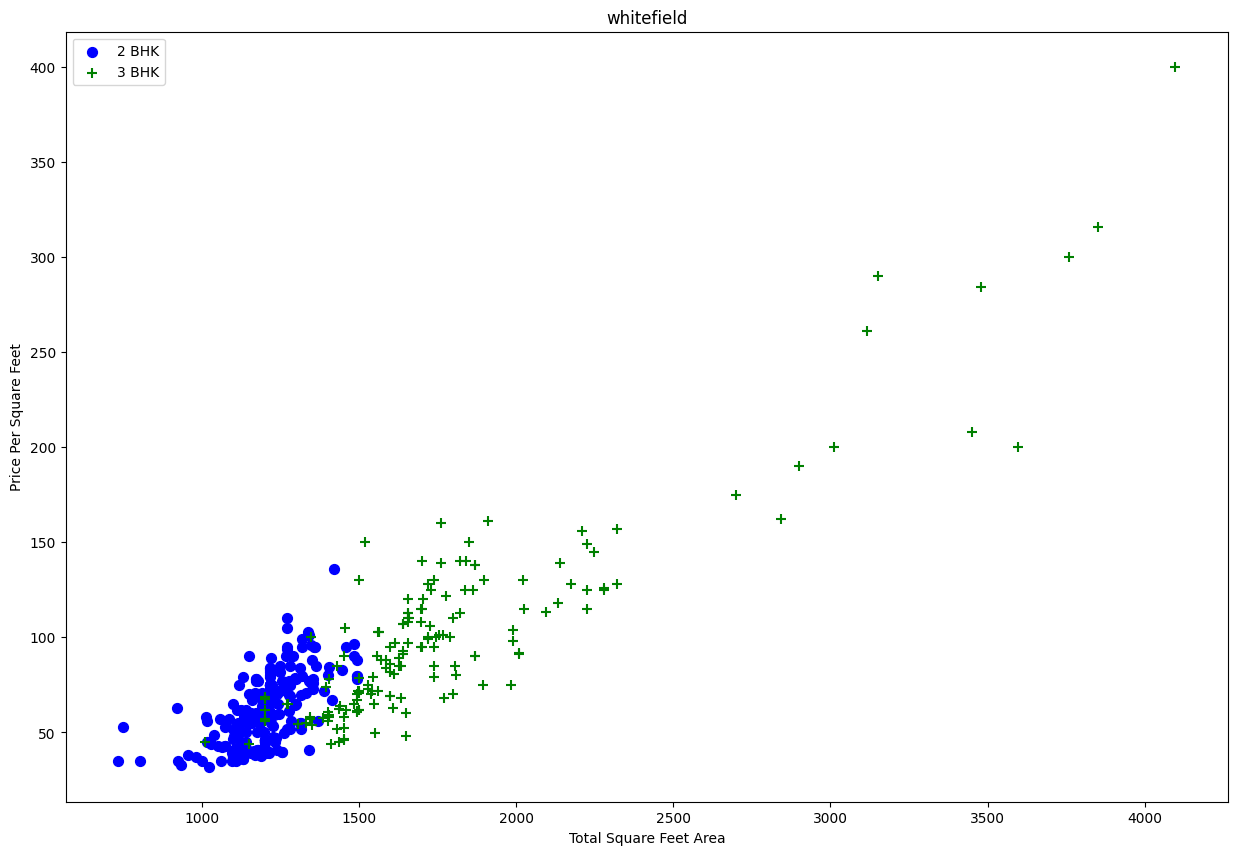

In [41]:
# Tests
plot_scatter_chart(no_outliers_df1, "whitefield")

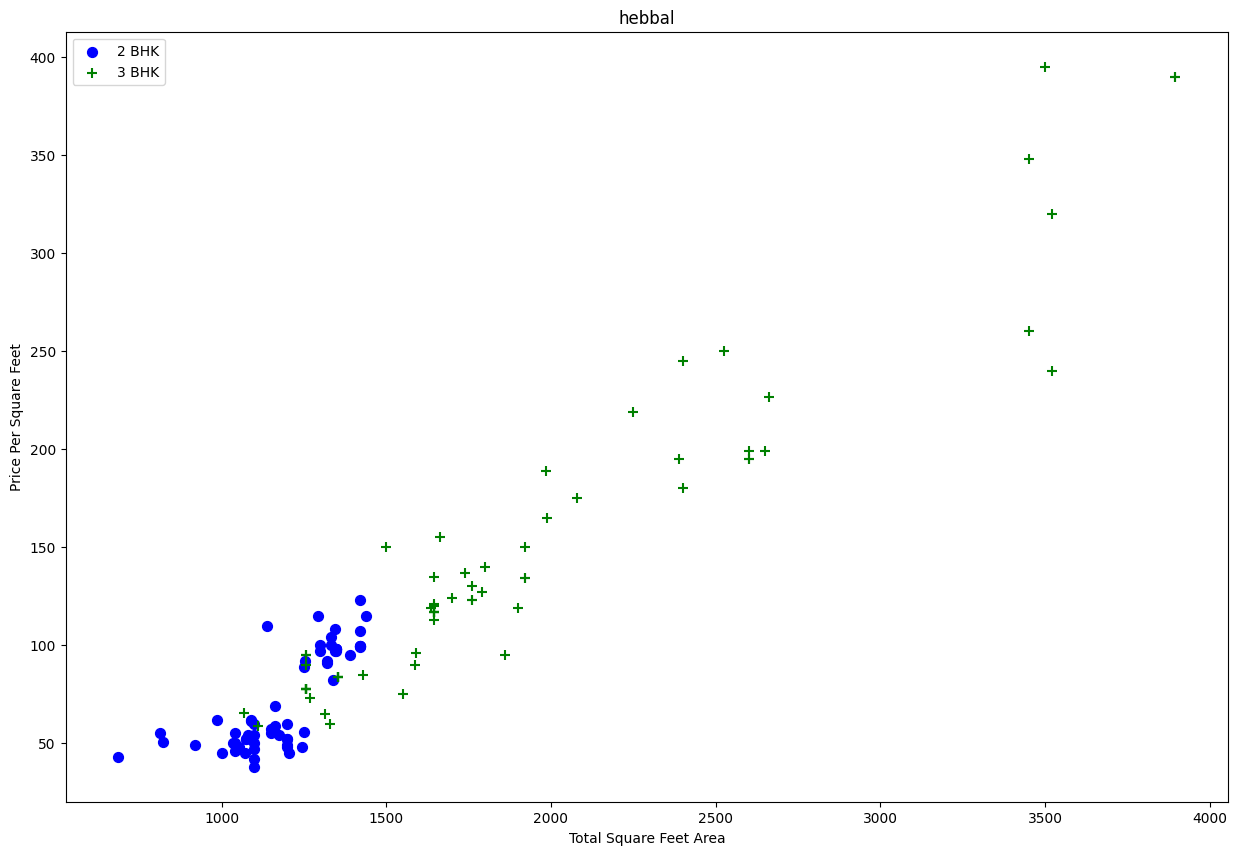

In [42]:
plot_scatter_chart(no_outliers_df1, "hebbal")

It is possible to see that in some cases, a 3 BHK location is cheaper than a 2 BHK, and the opposite is also noticeable. This indicates the presence of some outliers. The function remove_bhk_outliers will handle these outliers. The original method also used the mean and standard deviation as metrics, but modifying it with the median—since it is not influenced by outliers—and adding a threshold is more appropriate.

In [43]:
def remove_bhk_outliers(df, threshold=0.85, min_count=5):
    exclude_indices = []
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'median': np.median(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            lower_bhk = bhk - 1
            if lower_bhk in bhk_stats and bhk_stats[lower_bhk]['count'] >= min_count:
                lower_bhk_median = bhk_stats[lower_bhk]['median']
                condition = bhk_df['price_per_sqft'] < threshold * lower_bhk_median
                exclude_indices.extend(bhk_df[condition].index.tolist())
    
    return df.drop(exclude_indices, axis='index')

no_outliers_df2 = remove_bhk_outliers(no_outliers_df1, threshold=0.85)
no_outliers_df2.shape

(10077, 9)

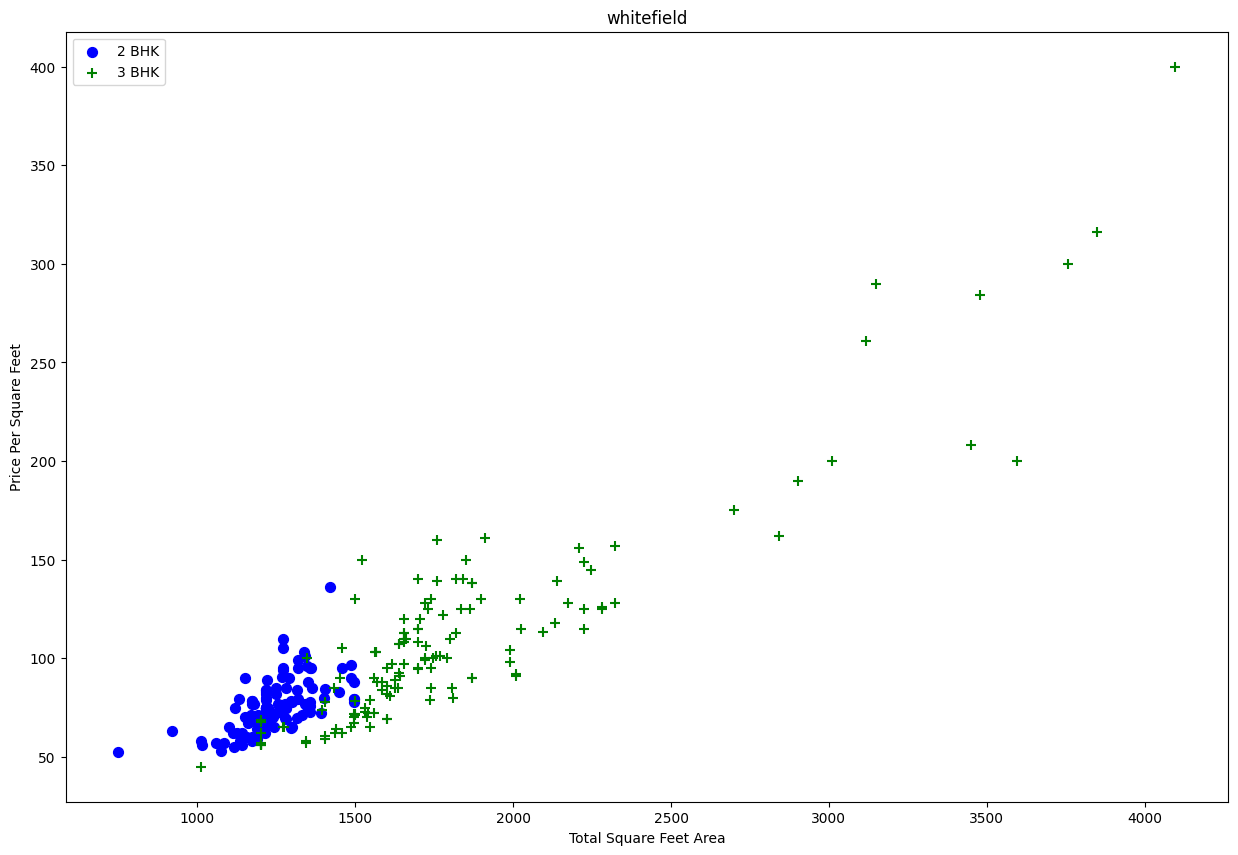

In [44]:
plot_scatter_chart(no_outliers_df2, "whitefield")

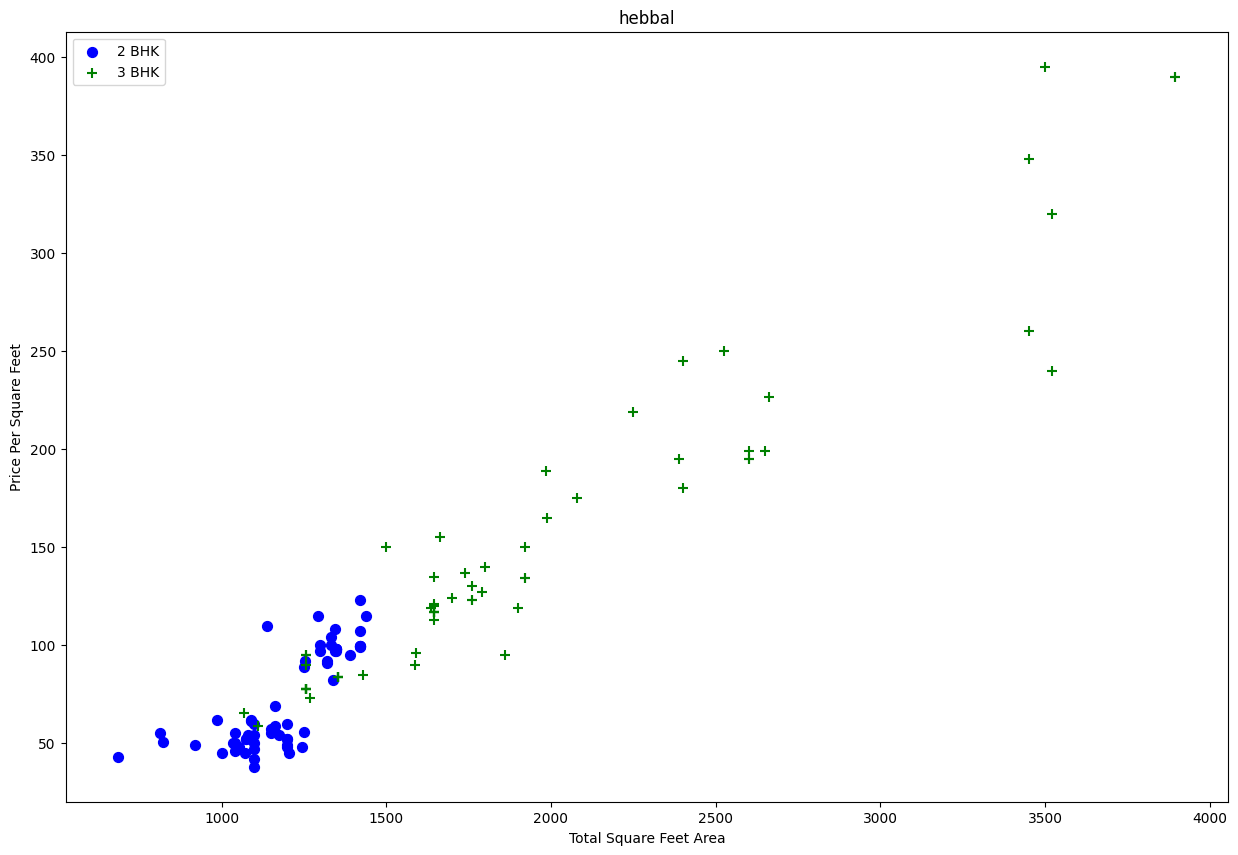

In [45]:
plot_scatter_chart(no_outliers_df2, "hebbal")

By reading this graph, it is perceptible that the 'price_per_sqft' follows a standard distribution.

Text(0, 0.5, 'Count')

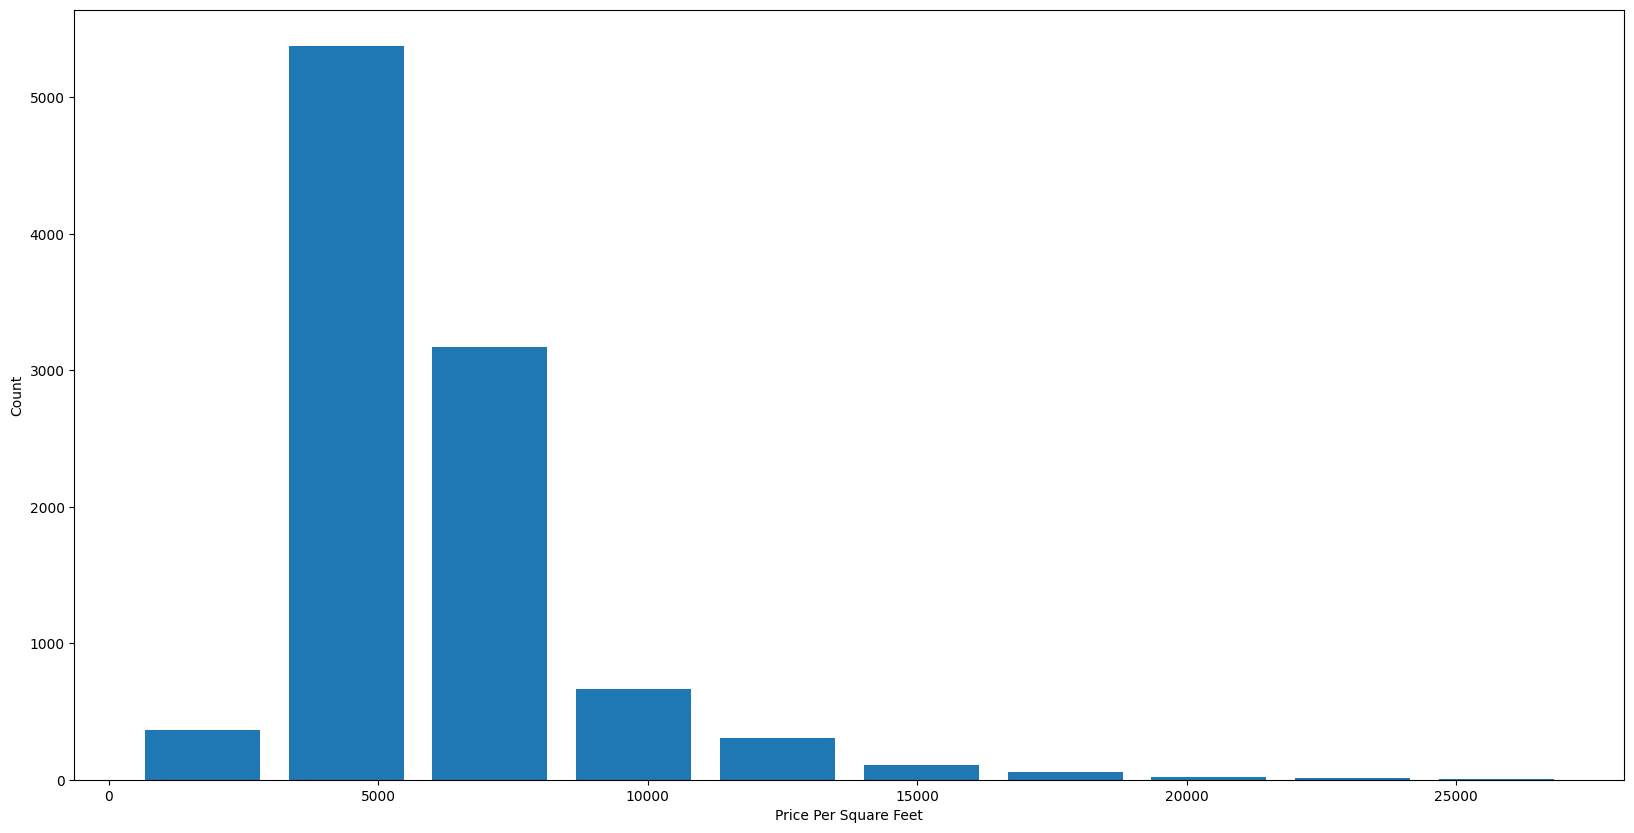

In [46]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(no_outliers_df2.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [47]:
# To remove outliers from 'bath', a business rule will be followed: A data point is considered an outlier if the number of bathrooms is greater than the number of rooms (BHK) plus 2.
print(f'Unique Bath Values: {no_outliers_df2.bath.unique()}')
print(f'Number of datapoints with more than 10 bathrooms: {no_outliers_df2[no_outliers_df2.bath>10].shape[0]}')
print(f'Number of datapoints that does not follow the bussines rule: {no_outliers_df2[no_outliers_df2.bath>=no_outliers_df2.bhk+2].shape[0]}')

Unique Bath Values: [ 4.  3.  2.  5.  1.  8.  7.  6.  9. 12. 16. 13. 10.]
Number of datapoints with more than 10 bathrooms: 5
Number of datapoints that does not follow the bussines rule: 101


Text(0, 0.5, 'Count')

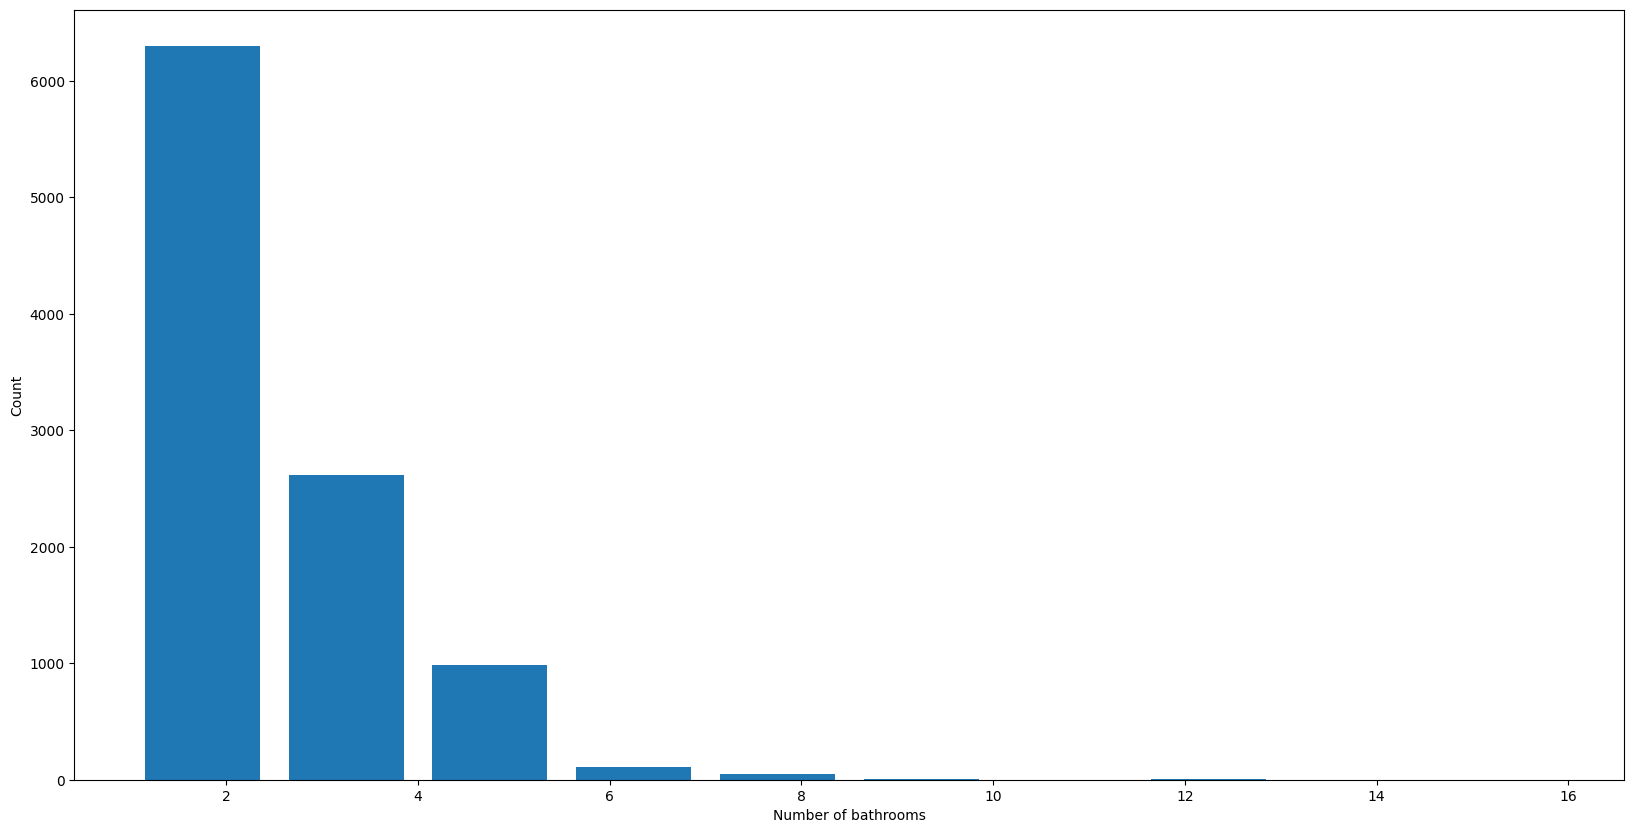

In [48]:
# Plot to see the count of unique values in 'bath'.
plt.hist(no_outliers_df2.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [49]:
no_outliers_df3 = no_outliers_df2[no_outliers_df2.bath<no_outliers_df2.bhk+2]
no_outliers_df3.shape

(9976, 9)

## 🔍 Numerical Columns Correlation Analysis

In this section, we will perform a correlation analysis on the numerical columns. Our goal is to assess whether these columns have an impact on the 'price' and whether the correlation is statistically significant.

This analysis will be conducted using the Pearson correlation method, visualized in a heatmap.

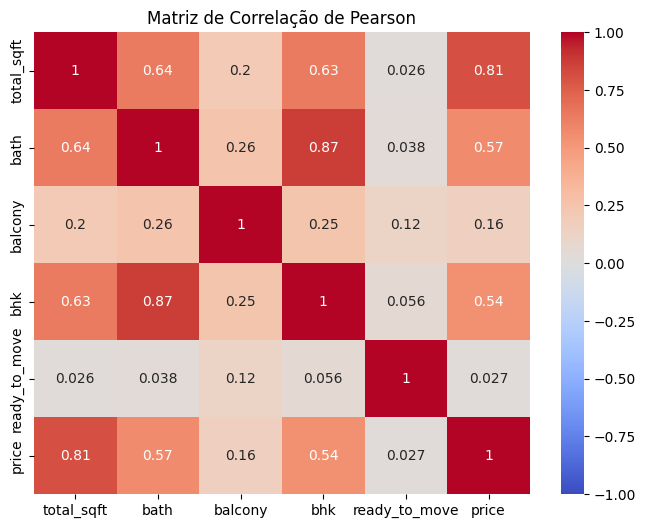

In [50]:
numerical_columns = ['total_sqft','bath','balcony','bhk','ready_to_move','price']
correlation_matrix = no_outliers_df3[numerical_columns].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Pearson')
plt.show()

Analyzing the heatmap, it is notable that the columns 'total_sqft', 'bath', and 'bhk' have an impact on price. Meanwhile, 'balcony' and 'ready_to_move' don't show much impact on the 'price'. The 'balcony' column will be removed from the model since it is not impactful. I had some interest in using the 'ready_to_move' column, so I decided to keep it in the model. Otherwise, it would be interesting to delete the column as well.

In [51]:
correlation_df = no_outliers_df3.copy()
correlation_df = correlation_df.drop('balcony', axis='columns')
correlation_df.head(3)

,location,size,total_sqft,bath,price,ready_to_move,bhk,price_per_sqft
0,1st block jayanagar,4 BHK,2850.0,4.0,428.0,0,4,15017.543860
1,1st block jayanagar,3 BHK,1630.0,3.0,194.0,0,3,11901.840491
2,1st block jayanagar,3 BHK,1875.0,2.0,235.0,1,3,12533.333333


## 🗑️ Removing 'size' and 'price_per_sqft' Columns

The first step here is to remove some columns that will not be useful for the model. Specifically, we will remove:

- **'size'**: This column is categorical and contains the same information as **'bhk'**.
- **'price_per_sqft'**: This column was created solely for outlier detection and is not needed for the model.

In [52]:
ml_df = correlation_df.drop(['size','price_per_sqft'],axis='columns')
ml_df.head(3)

,location,total_sqft,bath,price,ready_to_move,bhk
0,1st block jayanagar,2850.0,4.0,428.0,0,4
1,1st block jayanagar,1630.0,3.0,194.0,0,3
2,1st block jayanagar,1875.0,2.0,235.0,1,3


## 🏷️ Creating Dummies for the 'Location' Column

The **'Location'** column contains categorical data, which is not suitable for machine learning algorithms. A common approach to handle categorical data is by creating dummy variables (one-hot encoding).

In [53]:
# Creating the dummies
dummies = pd.get_dummies(ml_df.location)
ml_df2 = pd.concat([ml_df,dummies.drop('other',axis='columns')],axis='columns')
ml_df2.head()

,location,total_sqft,bath,price,ready_to_move,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1st block jayanagar,2850.0,4.0,428.0,0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st block jayanagar,1630.0,3.0,194.0,0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st block jayanagar,1875.0,2.0,235.0,1,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st block jayanagar,2400.0,4.0,450.0,1,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st block jayanagar,1000.0,3.0,60.0,1,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Dropping the last column to reduce the number of columns. If you think this column can be removed and the data will still be represented, it's because the values in this column won't be included in any other column. All zeros will indicate that the data belongs to another column.

In [54]:
ml_df3 = ml_df2.drop('location', axis='columns')
ml_df3.head(2)

,total_sqft,bath,price,ready_to_move,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,428.0,0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 🤖 Machine Learning

Finally, we reach the part where we choose the machine learning method and evaluate the results.

In [55]:
# Creating the data for the training and test
X = ml_df3.drop('price', axis='columns')
y = ml_df3.price

In [56]:
from sklearn.model_selection import train_test_split
# 20% of the samples are test samples and 80% for model traning
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

# This function store the data of some models and some configuration an it will be used to do an gridsearch to find the best model.

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            } 
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['friedman_mse', 'poisson'],
                'splitter': ['best', 'random']
            } 
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X.values,y)
        scores.append({
            'model':algo_name,
            'best_scores': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_scores','best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_scores,best_params
0,linear_regression,0.761074,{'fit_intercept': True}
1,lasso,0.655231,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.706957,"{'criterion': 'poisson', 'splitter': 'best'}"


The result is that the Linear Regression with fit_intercept true was the best model.

In [58]:
# Training the model and testing
lr_clf = LinearRegression(fit_intercept=True)
lr_clf.fit(X_train.values, y_train)
lr_clf.score(X_test.values,y_test)

0.7158896214945158

In [59]:
X.columns

Index(['total_sqft', 'bath', 'ready_to_move', 'bhk', '1st block jayanagar',
       '1st phase jp nagar', '2nd phase judicial layout',
       '2nd stage nagarbhavi', '5th block hbr layout', '5th phase jp nagar',
       ...
       'vijayanagar', 'vishveshwarya layout', 'vishwapriya layout',
       'vittasandra', 'whitefield', 'yelachenahalli', 'yelahanka',
       'yelahanka new town', 'yelenahalli', 'yeshwanthpur'],
      dtype='object', length=244)

In [60]:
def predict_price(location,sqft,bath,ready,bhk):
    # Get the exact position of the column with the name of the given location
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = ready
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [61]:
# The returned result is the Lakh Rupies value (price)
predict_price('1st phase jp nagar', 1000, 2, 1, 2)

np.float64(85.6114649212992)

In [62]:
predict_price('1st phase jp nagar', 1000, 2, 0, 2)

np.float64(89.0198443039882)

In [63]:
predict_price('indira nagar', 1000, 2, 1, 2)

np.float64(176.42404945388262)

In [64]:
predict_price('indira nagar', 1000, 3, 1, 3)

np.float64(183.09474796339657)

## 📦 Exporting the Trained Machine Learning Model

This step exports the trained model, including coefficients and parameters. It does not store the training data itself. These two actions create the artifacts that will be used later for predictions or model evaluation.

In [65]:
import pickle
with open('../server/artifacts/banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [66]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("../server/artifacts/columns.json", "w") as f:
    f.write(json.dumps(columns))